In [1]:
from pathlib import Path
from datetime import datetime
import pandas as pd
import great_expectations as ge

DATA_PATH = Path('../../../pet_project/tables')
DATA2_PATH = Path('../../../PTETA/PTETA/data/local/tables')


def get_tables(tabels_path: Path) -> list:
    result = [(datetime.strptime(p.name[9:-4], '%d_%b_%Y'), p)
              for p in tabels_path.iterdir()]

    return sorted(result, key=lambda x: x[0])

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from alibi_detect.cd import KSDrift

In [2]:
tables_path_list = get_tables(DATA_PATH) + get_tables(DATA2_PATH)
# tables_path_list

In [120]:
# Load labeled projects
df = pd.read_csv(tables_path_list[4][1])
# tags = pd.read_csv("https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tags.csv")
# df = ge.dataset.PandasDataset(pd.merge(projects, tags, on="id"))
# df["text"] = df.title + " " + df.description
# df.drop(["title", "description"], axis=1, inplace=True)
# df.head(5)

In [3]:
df = pd.read_csv(tables_path_list[1][1], encoding='utf-8', )

In [210]:
# df

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39943 entries, 0 to 39942
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           39943 non-null  int64  
 1   imei         39943 non-null  int64  
 2   name         39943 non-null  object 
 3   stateCode    39943 non-null  object 
 4   stateName    39943 non-null  object 
 5   lat          39943 non-null  float64
 6   lng          39943 non-null  float64
 7   speed        39943 non-null  float64
 8   orientation  39943 non-null  float64
 9   gpstime      39943 non-null  object 
 10  routeId      39943 non-null  int64  
 11  routeName    39943 non-null  object 
 12  routeColour  39943 non-null  object 
 13  inDepo       39943 non-null  bool   
 14  busNumber    39943 non-null  object 
 15  perevId      39943 non-null  int64  
 16  perevName    39943 non-null  object 
 17  remark       39943 non-null  object 
 18  online       39943 non-null  bool   
 19  idBu

In [22]:
ge_df = ge.dataset.PandasDataset(df)
# df["text"] = df.title + " " + df.description
# df.drop(["title", "description"], axis=1, inplace=True)
# df.head(5)

c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
df.columns

c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'imei', 'name', 'stateCode', 'stateName', 'lat', 'lng', 'speed',
       'orientation', 'gpstime', 'routeId', 'routeName', 'routeColour',
       'inDepo', 'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'],
      dtype='object')

In [28]:
ge_df.expect_column_values_to_not_be_null(column=['id', 'imei', 'lat', 'lng', 'gpstime', 'routeId', 'routeName'])
# ge_df.expect_column_values_to_be_of_type(column="text", type_="str")
expectation_suite = ge_df.get_expectation_suite()

ge_df.validate(expectation_suite=expectation_suite, only_return_failures=True)

c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{
  "results": [],
  "success": true,
  "statistics": {
    "evaluated_expectations": 0,
    "successful_expectations": 0,
    "unsuccessful_expectations": 0,
    "success_percent": null
  },
  "meta": {
    "great_expectations_version": "0.15.28",
    "expectation_suite_name": "default",
    "run_id": {
      "run_name": null,
      "run_time": "2022-10-27T22:28:47.957088+00:00"
    },
    "batch_kwargs": {
      "ge_batch_id": "3da676af-5646-11ed-942e-8cc681891661"
    },
    "batch_markers": {},
    "batch_parameters": {},
    "validation_time": "20221027T222847.957088Z",
    "expectation_suite_meta": {
      "great_expectations_version": "0.15.28"
    }
  },
  "evaluation_parameters": {}
}

In [46]:
# ge_df.get_expectation_suite()

{
  "ge_cloud_id": null,
  "expectation_suite_name": "default",
  "expectations": [
    {
      "expectation_type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "lat"
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "lng"
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_be_of_type",
      "kwargs": {
        "column": "lng",
        "type_": "float"
      },
      "meta": {}
    }
  ],
  "data_asset_type": "Dataset",
  "meta": {
    "great_expectations_version": "0.15.28"
  }
}

In [122]:
ge_df = ge.dataset.PandasDataset(df)

# ge_df.expect_column_values_to_not_be_null(column='id')
# ge_df.expect_column_values_to_be_of_type(column='id', type_="int")

ge_df.expect_column_values_to_not_be_null(column='lat')
ge_df.expect_column_values_to_be_of_type(column='lat', type_="str")

ge_df.expect_column_values_to_not_be_null(column='lng')
ge_df.expect_column_values_to_be_of_type(column='lng', type_="float")

# ge_df.expect_column_values_to_not_be_null(column='gpstime')

expectation_suite = ge_df.get_expectation_suite()
ge_df.validate(expectation_suite=expectation_suite, only_return_failures=False)

c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{
  "results": [
    {
      "expectation_config": {
        "expectation_type": "expect_column_values_to_not_be_null",
        "kwargs": {
          "column": "lat"
        },
        "meta": {}
      },
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "result": {
        "element_count": 247415,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "partial_unexpected_list": []
      },
      "meta": {},
      "success": true
    },
    {
      "expectation_config": {
        "expectation_type": "expect_column_values_to_not_be_null",
        "kwargs": {
          "column": "lng"
        },
        "meta": {}
      },
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "result": {
        "element_count": 247415,
        "unexpected_co

In [20]:
def get_time_dist(table_info): 
    df = pd.read_csv(table_info[1])
    updates_time = (pd.to_datetime(df['gpstime']).values - np.datetime64(table_info[0])).astype(float)/1e9/3600
    dist = np.histogram(updates_time, bins=24*6, range=(-1, 23))
    dist[0][0] += np.sum(updates_time < dist[1][0])
    dist[0][-1] += np.sum(updates_time > dist[1][-1] )
    
    return dist

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


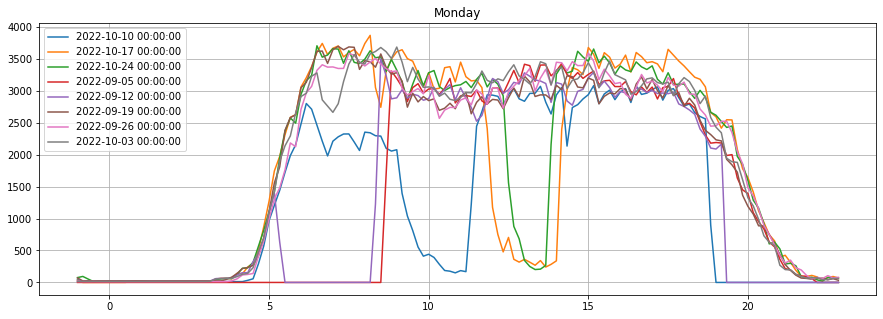

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


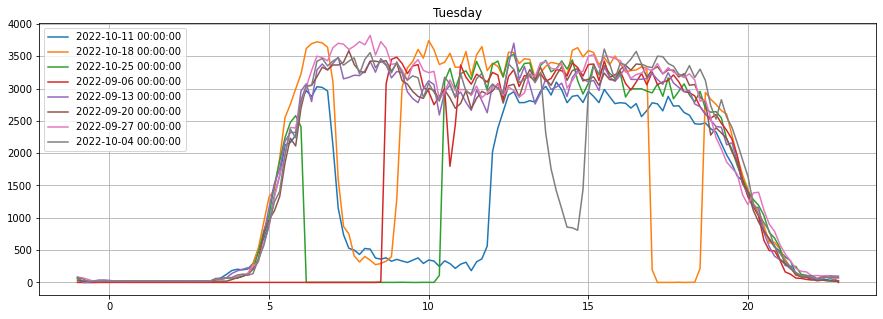

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (13,18,22,23,24,29,31,32,33,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program file

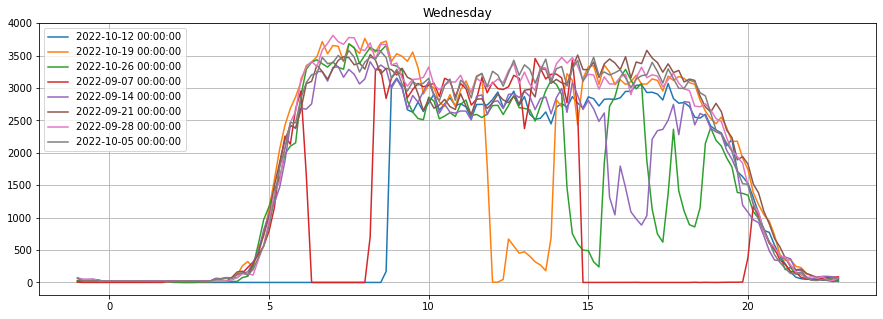

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


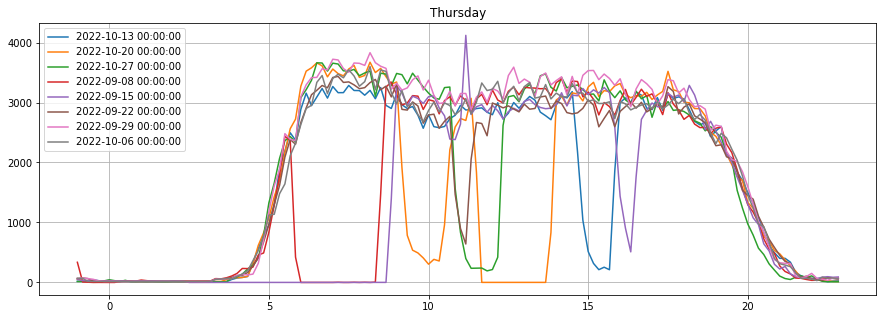

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


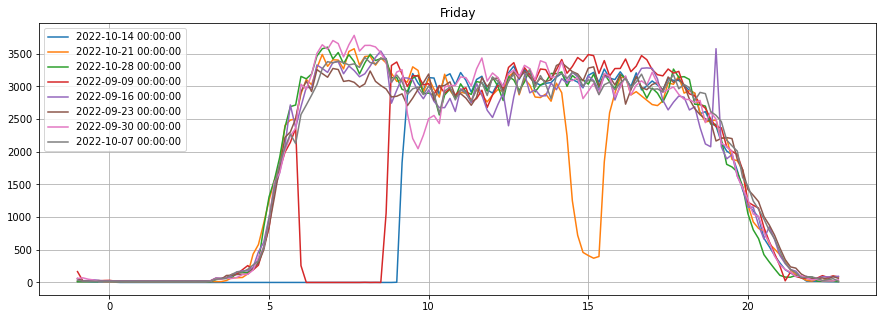

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


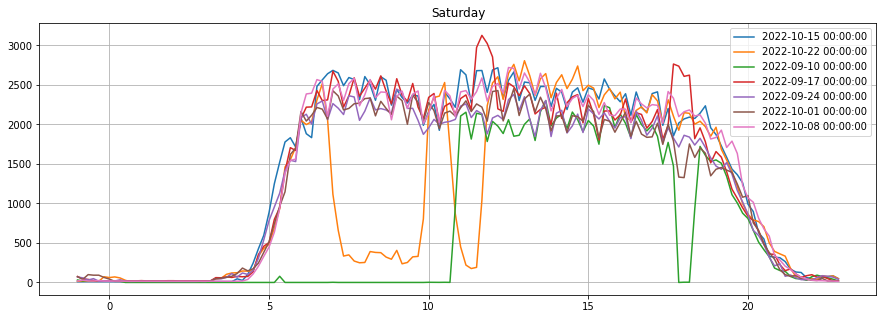

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


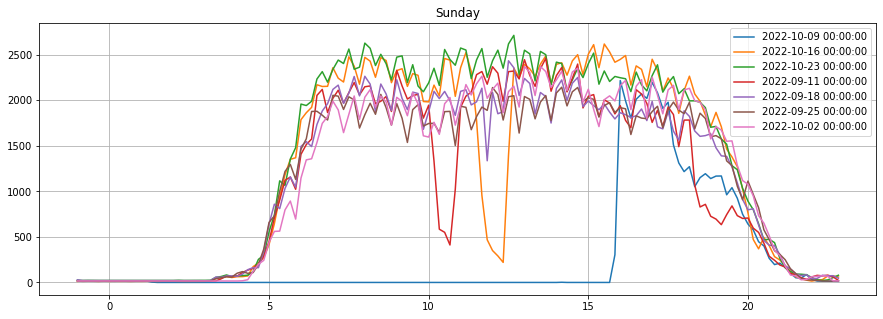

In [21]:
dists = dict()

for weekday_num in range(7): 
    plt.figure(figsize=(15, 5))
    loc_table_info = [table_info for table_info in tables_path_list 
           if table_info[0].weekday() == weekday_num]
    
    
    for i, table_info in enumerate(loc_table_info):
        weekday_word = table_info[0].strftime("%A")
        dist_hist = get_time_dist(table_info)
        plt.plot(dist_hist[1][:-1], dist_hist[0], label=table_info[0]) 
        if dists.get(weekday_word) is None: 
            dists[weekday_word] = dist_hist[0]
        else: 
            dists[weekday_word] = np.dstack([dists[weekday_word], dist_hist[0]])
    
    plt.title(weekday_word)
    plt.legend()
    plt.grid()
    plt.show()

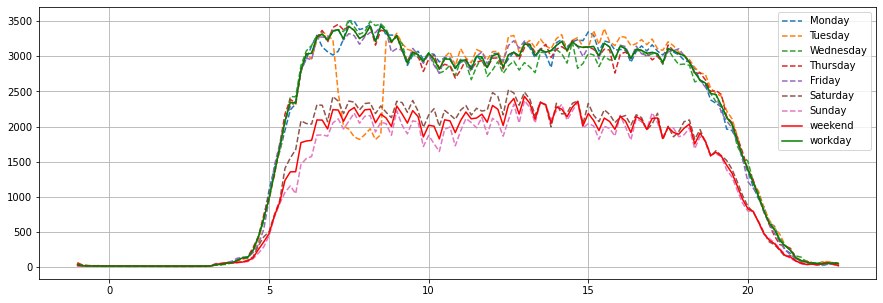

In [23]:
plt.figure(figsize=(15, 5))

for weekday_name in dists: 
    
    plt.plot(dist_hist[1][:-1], 
             np.median(dists[weekday_name], axis=2)[0], 
             label=weekday_name, linestyle='--') 
        
weekend = [np.median(dists[wd_name], axis=2)[0]
           for wd_name in dists if wd_name in ['Sunday', 'Saturday'] ]
weekend = np.median(np.dstack(weekend), axis=2)[0] 
plt.plot(dist_hist[1][:-1], weekend, 'r', label='weekend') 

workday = [np.median(dists[wd_name], axis=2)[0]
           for wd_name in dists if not(wd_name in ['Sunday', 'Saturday']) ]

workday = np.median(np.dstack(workday), axis=2)[0] 
plt.plot(dist_hist[1][:-1], workday, 'g', label='workday') 

        
plt.legend()
plt.grid()
plt.show()

In [65]:
dist_hist[1][:-1]
# workday.shape

array([-1.        , -0.83333333, -0.66666667, -0.5       , -0.33333333,
       -0.16666667,  0.        ,  0.16666667,  0.33333333,  0.5       ,
        0.66666667,  0.83333333,  1.        ,  1.16666667,  1.33333333,
        1.5       ,  1.66666667,  1.83333333,  2.        ,  2.16666667,
        2.33333333,  2.5       ,  2.66666667,  2.83333333,  3.        ,
        3.16666667,  3.33333333,  3.5       ,  3.66666667,  3.83333333,
        4.        ,  4.16666667,  4.33333333,  4.5       ,  4.66666667,
        4.83333333,  5.        ,  5.16666667,  5.33333333,  5.5       ,
        5.66666667,  5.83333333,  6.        ,  6.16666667,  6.33333333,
        6.5       ,  6.66666667,  6.83333333,  7.        ,  7.16666667,
        7.33333333,  7.5       ,  7.66666667,  7.83333333,  8.        ,
        8.16666667,  8.33333333,  8.5       ,  8.66666667,  8.83333333,
        9.        ,  9.16666667,  9.33333333,  9.5       ,  9.66666667,
        9.83333333, 10.        , 10.16666667, 10.33333333, 10.5 

In [67]:
gps_data_update_frequency = dict({
    "workday": [dist_hist[1][:-1].tolist(), workday.tolist()], 
    "weekend": [dist_hist[1][:-1].tolist(), weekend.tolist()]
})
# gps_data_update_frequency

with open('../data/gps_data_update_frequency.json', 'w', encoding='utf-8') as f:
    json.dump(gps_data_update_frequency, f, ensure_ascii=False)

In [31]:
with open('../data/gps_data_update_frequency.json', 'r', encoding='utf-8') as f:
    gps_data_update_frequency = json.load(f)

In [32]:
gps_data_update_frequency.keys()


dict_keys(['workday', 'weekend'])

In [62]:
len(gps_data_update_frequency['workday'])

144

In [33]:
# Initialize drift detector
drift_detector = KSDrift(workday, p_val=0.01)

In [40]:
skd = drift_detector.predict(dists['Monday'][0][:, 0], return_p_val=True, return_distance=True)['data']
f"is_drift: {skd['is_drift']}, 'distance': {skd['distance'][0]}, 'p_val': {skd['p_val'][0]:.4f}"

{'is_drift': 1,
 'distance': array([0.38194445], dtype=float32),
 'p_val': array([5.9103306e-10], dtype=float32),
 'threshold': 0.01}

In [280]:
dists['Monday'].shape

(1, 150, 8)

In [18]:
24*6

144

In [59]:
table_info + ('s',)

(datetime.datetime(2022, 10, 2, 0, 0),
 WindowsPath('../../../PTETA/PTETA/data/local/tables/data_for_02_OCT_2022.csv'),
 's')

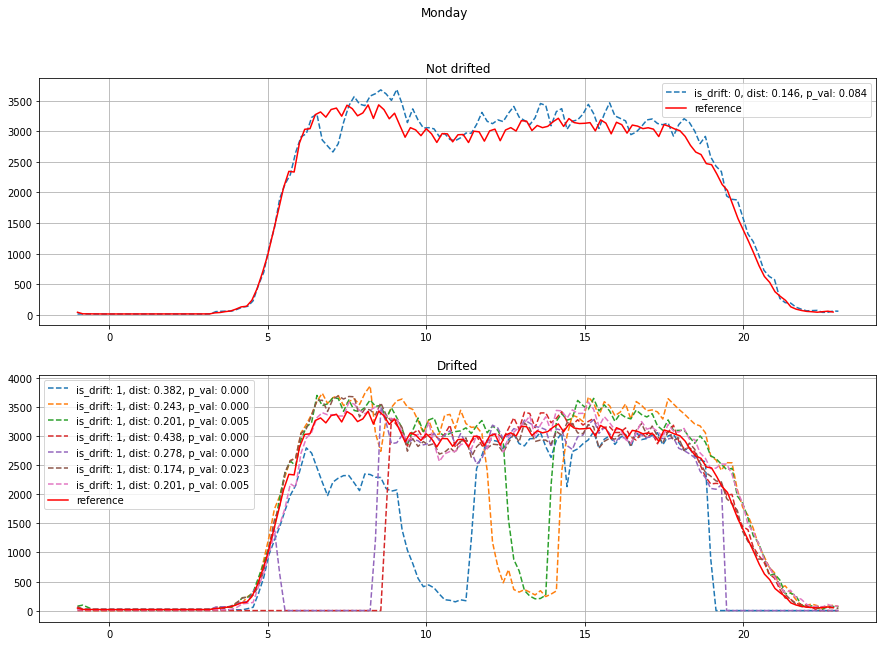

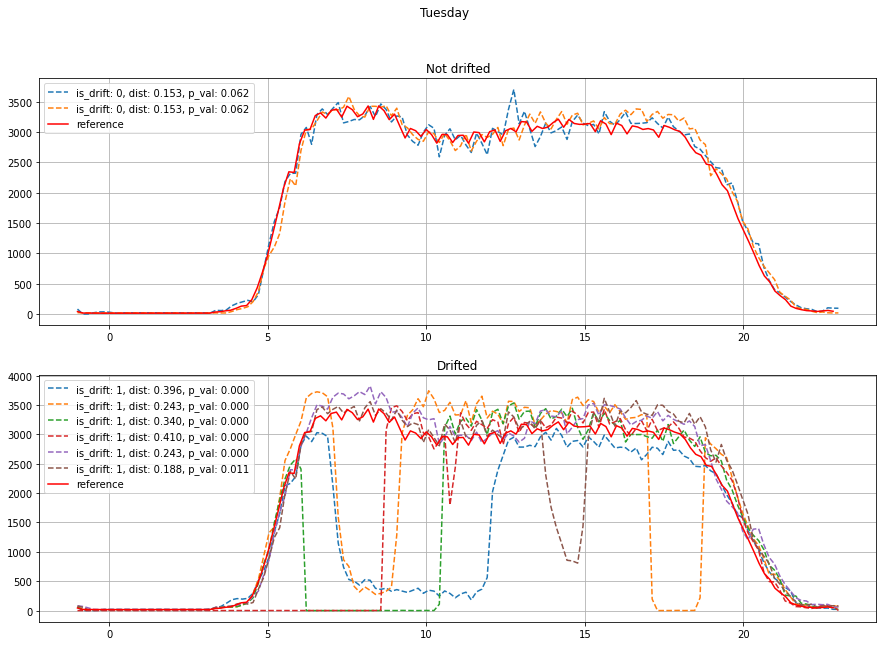

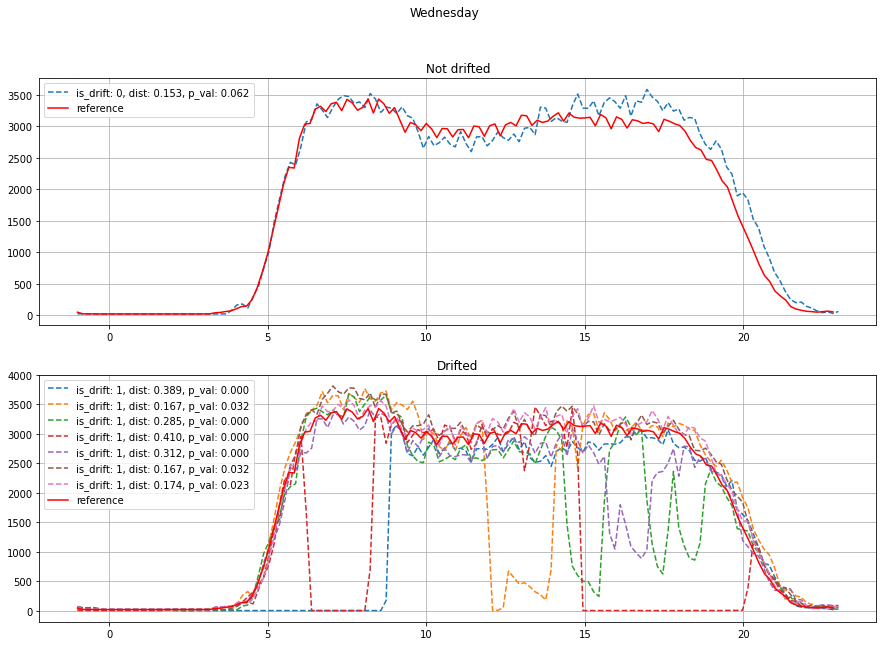

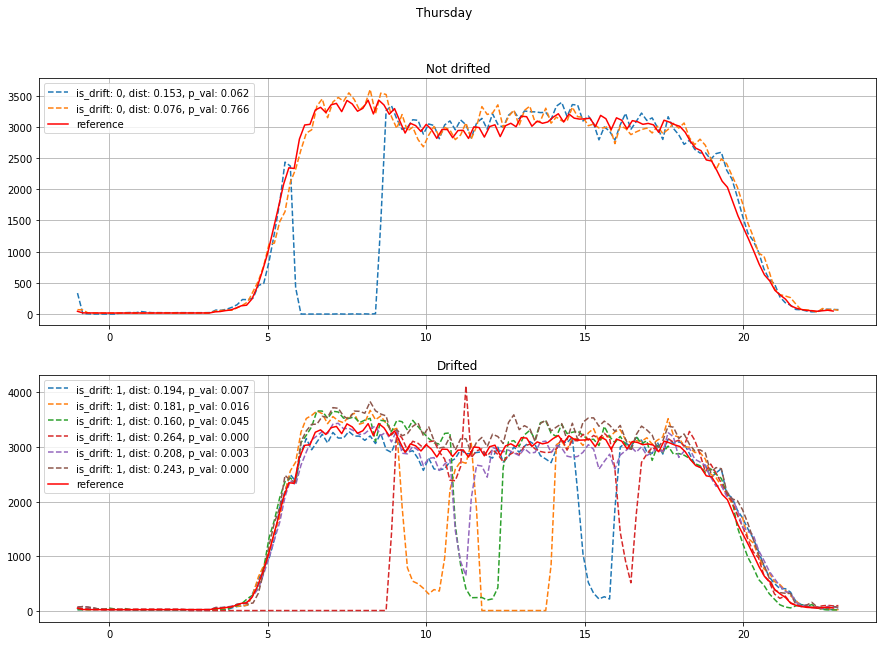

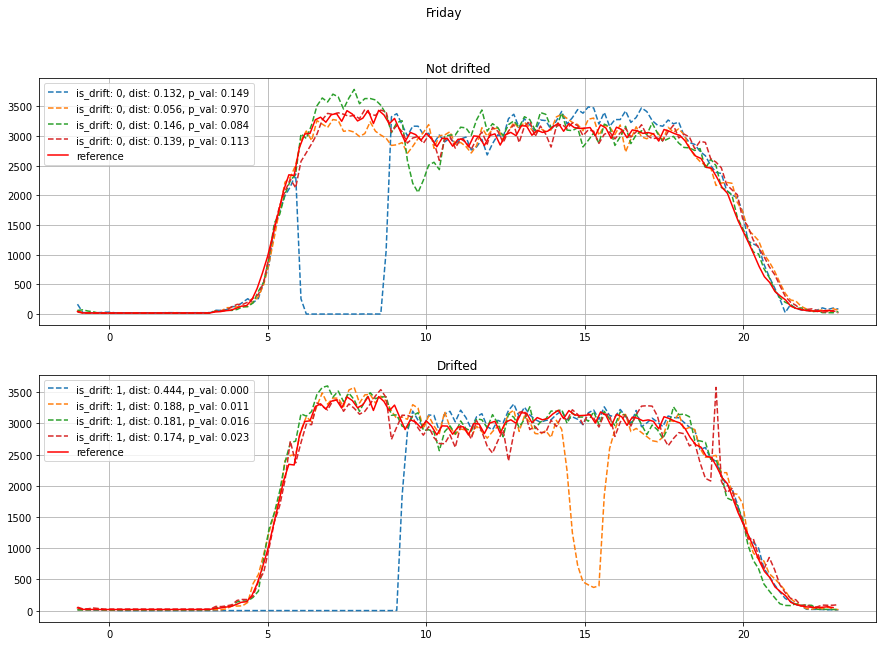

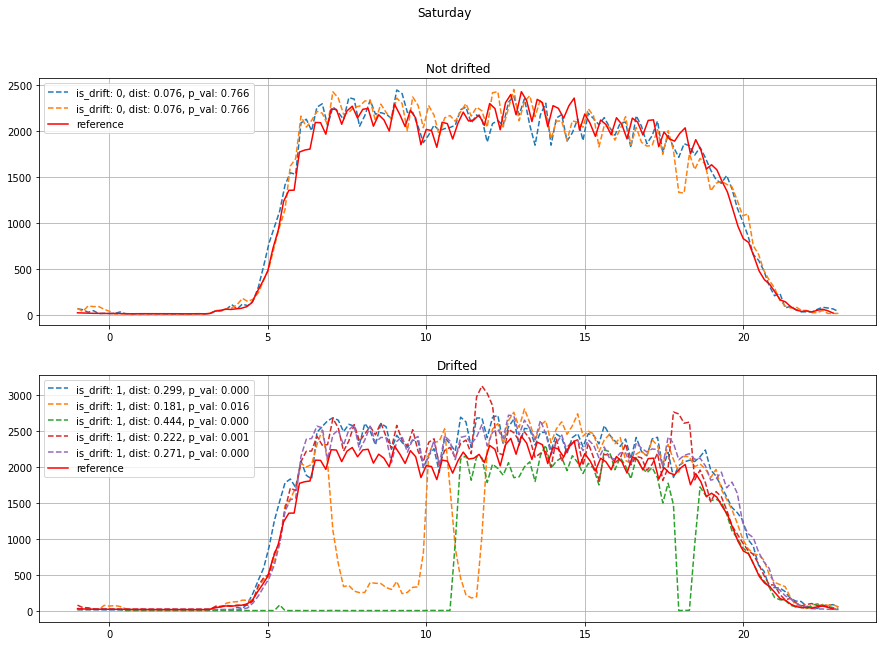

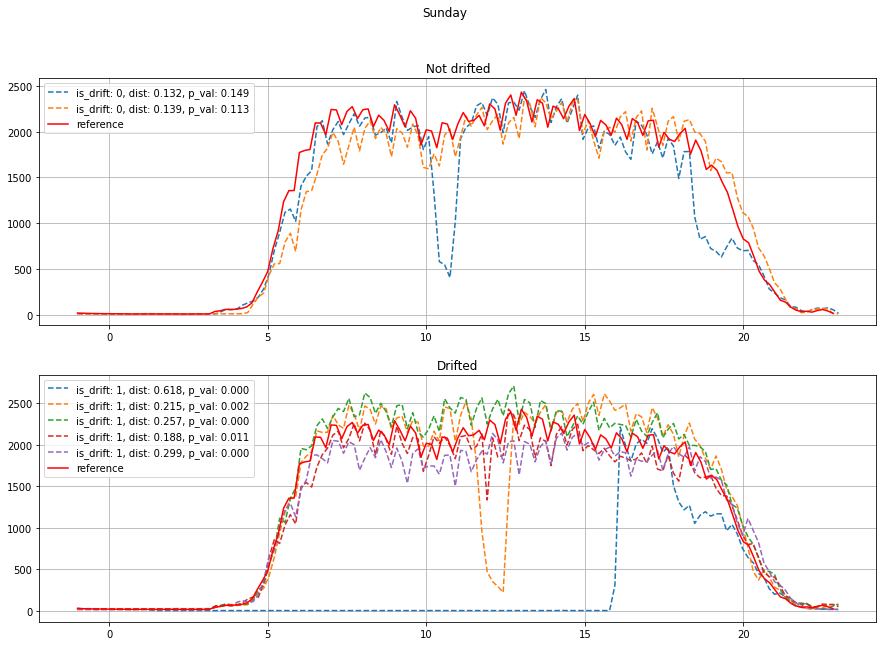

In [56]:
timespace = np.linspace(-1, 23, num=24*6)

for wd_num, wd_name in enumerate(dists): 
#     plt.figure(figsize=(15, 5))
    

    ref_dist = None
    if wd_num < 5:
        ref_dist = gps_data_update_frequency['workday']
    else: 
        ref_dist = gps_data_update_frequency['weekend']
    ref_dist = np.array(ref_dist)
        
    # Initialize drift detector
    drift_detector = KSDrift(ref_dist, p_val=0.05)
    
    f, ax = plt.subplots(2, 1, figsize=(15, 10))
 
    wd_dists = dists[wd_name][0]
    for i in range(wd_dists.shape[-1]):
        skd = drift_detector.predict(wd_dists[:, i], return_p_val=True, return_distance=True)['data']
        
        ax[skd['is_drift']].plot(timespace, 
                 wd_dists[:, i], 
                 label=f"is_drift: {skd['is_drift']}, dist: {skd['distance'][0]:.3f}, p_val: {skd['p_val'][0]:.3f}", 
                 linestyle='--') 

        
    for i in range(2):
        ax[i].plot(dist_hist[1][:-1], ref_dist, 'r', label='reference') 
        ax[i].set_title(f"{'Drifted' if i else 'Not drifted'}")
        ax[i].legend()
        ax[i].grid()
    f.suptitle(wd_name)
    plt.show()